<a href="https://colab.research.google.com/github/DonRoboto/CursoMOO/blob/main/SDG_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import random
#from sympy import Symbol
from sympy import *
#import sympy as symbol

#random.seed(1000)

#alpha = random.random()
alpha = 5
ro = 0.8
c = 0.1
x0 = random.randint(-500, 500)
x1 = random.randint(-500, 500)
x2 = random.randint(-500, 500)
X = np.array([[x0], [x1], [x2]])

print(alpha)
print(X)

5
[[  9]
 [291]
 [333]]


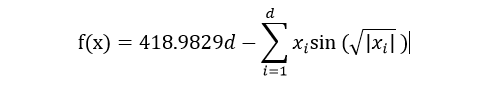

In [ ]:
x0 = Symbol('x0')
x1 = Symbol('x1')
x2 = Symbol('x2')

#Sphere function
#fx = x0**2 + x1**2 + x2**2

#Rosenbrock function
#fx = (100*(x1-x0**2)**2) + (1-x0)**2 + (100*(x2-x1**2)**2) + (1-x1)**2

#Schwefel Function
d=3
#fx = (418.8929 * d)  -  ( (x0 * sin( sqrt(abs(x0)) ) )  + (x1 * sin( sqrt(abs(x1)) ))  + (x2 * sin( sqrt(abs(x2)) ))   )
fx = (418.8929 * d)  -  ( (x0 * sin( sqrt(  sqrt(x0**2)  ) ) )  + (x1 * sin( sqrt(  sqrt(x1**2)   ) ))  + (x2 * sin( sqrt(  sqrt(x2**2)   ) ) )   )

In [ ]:
origen_0 = fx.subs([(x0, float(X[0])), (x1, float(X[1])), (x2, float(X[2]))]).doit()
print(X)
print(origen_0)


f0=fx.diff(x0)
f1=fx.diff(x1)
f2=fx.diff(x2)

print(f0)
print(f1)
print(f2)

print(f0.subs(x0, 4.2).doit())
print(f1.subs(x1, 4.3).doit())
print(f2.subs(x2, 4.4).doit())

[[  9]
 [291]
 [333]]
1727.76677316894
-(x0**2)**(1/4)*cos((x0**2)**(1/4))/2 - sin((x0**2)**(1/4))
-(x1**2)**(1/4)*cos((x1**2)**(1/4))/2 - sin((x1**2)**(1/4))
-(x2**2)**(1/4)*cos((x2**2)**(1/4))/2 - sin((x2**2)**(1/4))
-0.415739077305085
-0.376545521575530
-0.337080850385028


In [ ]:

def gradiente(X):
  return np.array([[fx.diff(x0).subs([(x0, float(X[0])), (x1, float(X[1])), (x2, float(X[2])) ] )], [fx.diff(x1).subs([(x0, float(X[0])), (x1, float(X[1])), (x2, float(X[2])) ] )], [fx.diff(x2).subs([(x0, float(X[0])), (x1, float(X[1])), (x2, float(X[2])) ] )]])
  #return np.array([fx.diff(x0), fx.diff(x1), fx.diff(x2)])

def direction(X):
  dy = -1 * gradiente(X)
  return dy

def step_size(X, alpha, ro, c):
  counter = 0
  origen_0 = fx.subs([(x0, float(X[0])), (x1, float(X[1])), (x2, float(X[2]))])
  f_k = round(float(origen_0), 4)
  #f_k = origen_0

  pk = direction(X)
  #g = np.array([fx.diff(x).subs(x, float(X[0])), fx.diff(y).subs(y, float(X[1])), fx.diff(z).subs(z, float(X[2]))] )
  g = gradiente(X)


  #print(X)
  #print(float(X[0]))
  #print(float(X[1]))
  #print(float(X[2]))
  #print(origen_0)
  #print(pk)
  #print(g)


  while True:
    dato1 = X  + (alpha * pk)
    destino_0 = fx.subs( [ (x0, float(dato1[0])), (x1, float(dato1[1])), (x2, float(dato1[2])) ] )

    dato3 = (c * alpha) * np.dot(g.T, pk)
    penal_0 = dato3[0,0]

    f_n = round(float(destino_0), 6)
    penalty = round(float(penal_0), 6)

    if (f_n <= f_k + penalty) or (counter>100):
      return alpha

    #print(alpha)
    alpha = round(ro * alpha, 6)
    counter = counter + 1


In [ ]:
#a = gradiente(X)
#bb = a[1].subs(x0, float(X[0]))
#.subs([(x0, float(X[0])), (x1, float(X[1])), (x2, float(X[2]))])

#print(bb)

In [ ]:

import progressbar

prev_val = 1000000
epsilon = 0.1
counter=0
max_value=100000

bar = progressbar.ProgressBar(max_value=max_value)

while True:
  pk = direction(X)
  #print('direccion={}'.format(pk.T))
  
  #print('ro: {}'.format(ro))  
  alpha = step_size(X, alpha, ro, c)
  #print('alpha: {}'.format(alpha) )

  Xn = X + (alpha * pk) 
  actual_val = fx.subs([ (x0, float(Xn[0])), (x1, float(Xn[1])), (x2, float(Xn[2])) ] )

  #print('f(X)={}'.format(prev_val))
  #print('f(Xn)={}'.format(actual_val))
  #print('alfa={}'.format(alpha))
  #print('*********')

  if (round(abs(actual_val - prev_val),6)<epsilon) or (counter>=max_value):
    break
  #if (counter>10):
  #  break

  X = Xn
  prev_val=actual_val
  counter = counter + 1

  #time.sleep(0.1)
  bar.update(counter)

print('\n')
print('Xn={}'.format(Xn))
print('f(Xn)={}'.format(actual_val))
print(counter)

  0% (5 of 100000) |                     | Elapsed Time: 0:00:00 ETA:   0:41:10



Xn=[[4.85602963402428]
 [203.814261129912]
 [420.968746698604]]
f(Xn)=631.936940901859
6
